In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv')



# Testing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

class MiniLinearForest:
    def __init__(self, nearest_segments=2, nearest_weight=0.4, rest_weight=0.6):
        self.intercepts = []
        self.slopes = []
        self.nearest_weight = nearest_weight
        self.rest_weight = rest_weight
        self.nearest_segments = nearest_segments

    def train(self, data):

        x = np.array(data['X']).reshape(-1, 1)
        y = np.array(data['Y']).reshape(-1, 1)

        sorted_indices = np.argsort(x.flatten())
        x_sorted = x[sorted_indices]
        y_sorted = y[sorted_indices]

        for i in range(len(x_sorted) - 1):
            lr = LinearRegression()
            lr.fit(x_sorted[i:i+2], y_sorted[i:i+2])

            self.intercepts.append(lr.intercept_[0])
            self.slopes.append(lr.coef_[0][0])

    def predict(self, new_x):
        predicted_prices = []
        for area in new_x:
            nearest_weighted_sum = 0
            rest_weighted_sum = 0
            nearest_count = 0
            rest_count = 0
            
            for i, slope in enumerate(self.slopes):
                predicted_price = self.intercepts[i] + slope * area
                if i < self.nearest_segments:  # Considering the nearest segments based on user input
                    nearest_weighted_sum += self.nearest_weight * predicted_price
                    nearest_count += 1
                else:
                    rest_weighted_sum += self.rest_weight * predicted_price
                    rest_count += 1

            if nearest_count > 0 and rest_count > 0:
                weighted_avg_prediction = (nearest_weighted_sum / nearest_count) + (rest_weighted_sum / rest_count)
            elif nearest_count > 0:
                weighted_avg_prediction = nearest_weighted_sum / nearest_count
            else:
                weighted_avg_prediction = rest_weighted_sum / rest_count
            
            predicted_prices.append(weighted_avg_prediction)

        return predicted_prices

# Inside MiniLinearForest class
    def plot_predictions(self, data, new_x, predicted_prices):
        plt.figure(figsize=(8, 6))
        plt.scatter(data['X'], data['Y'], label='Original Data')
        plt.title('Piecewise Linear Model with Predicted Values (Weighted Aggregation)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)

        for i in range(len(self.intercepts)):
            plt.plot([data['X'].iloc[i], data['X'].iloc[i+1]], 
                     [self.intercepts[i] + self.slopes[i] * data['X'].iloc[i], self.intercepts[i] + self.slopes[i] * data['X'].iloc[i+1]], 
                     c='r')

        plt.scatter(new_x, predicted_prices, c='g', marker='o', label='Predicted Values')

        # Connect predicted points based on nearest segment slope and intercept
        for i in range(len(new_x)):
            min_dist = float('inf')
            nearest_index = -1
            for j in range(len(self.intercepts)):
                dist = abs(self.intercepts[j] + self.slopes[j] * new_x[i] - predicted_prices[i])
                if dist < min_dist:
                    min_dist = dist
                    nearest_index = j
            plt.plot([new_x[i], data['X'].iloc[nearest_index + 1]], 
                     [predicted_prices[i], self.intercepts[nearest_index + 1] + self.slopes[nearest_index + 1] * data['X'].iloc[nearest_index + 1]], 
                     c='b')

        plt.legend()
        plt.show()



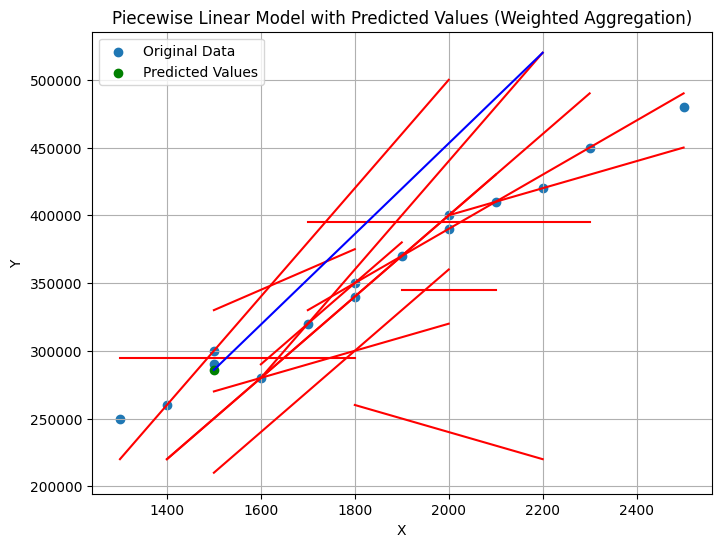

In [3]:


data = {'X': df['Area'].to_list(), 'Y':df['Price'].to_list()}  # Sample X and Y values
new_x = [1500]  # New X values to predict

forest = MiniLinearForest(nearest_segments=1, nearest_weight=0.3, rest_weight=0.7)
forest.train(data)

predicted_prices = forest.predict(new_x)
forest.plot_predictions(pd.DataFrame(data), new_x, predicted_prices)


In [4]:
df['Area'].to_list()

[1500,
 2000,
 1300,
 1800,
 2200,
 1600,
 1900,
 2100,
 1400,
 2300,
 1700,
 2500,
 2000,
 1500,
 1800]